### Белянинов Илья ПМ22-1

### Семинар

1)Сгенерируйте данные и обучите на них модель перцептрона.

2)Просмотрите параметры модели, визуализируйте и улучшите ее работу.

In [6]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

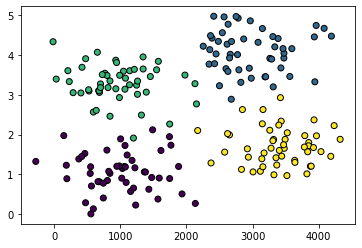

In [16]:
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200, 
                          centers=blob_centers, 
                          cluster_std=0.5,
                          random_state=0)

X[:, 0] *= 1000

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

In [17]:
clf = MLPClassifier(hidden_layer_sizes=(6,), 
                    random_state=1).fit(X, y)

In [18]:
print("Веса между входным и скрытым слоем:")
print(clf.coefs_[0])
print("\nВеса между скрытым и выходным слоем:")
print(clf.coefs_[1])

Веса между входным и скрытым слоем:
[[-0.09809877  0.33667051 -0.82024119 -0.29720839 -0.56852789 -0.66056109]
 [-0.58903611 -0.31219238 -0.22424296  0.11423652 -0.18324369  0.37321781]]

Веса между скрытым и выходным слоем:
[[-0.51316658 -0.43365467  0.43189995  0.68148414]
 [-0.24370005  0.34328608  0.57835494  0.57889271]
 [-0.59713359 -0.67678056 -0.46609801  0.54011704]
 [-0.5769702  -0.10221922  0.75476969  0.00610289]
 [ 0.34285864 -0.25645017  0.33417991  0.47281254]
 [-0.7006119   0.35515533  0.80295119  0.33880635]]


In [19]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.09809877 -0.58903611], 
0 1 [ 0.33667051 -0.31219238], 
0 2 [-0.82024119 -0.22424296], 
0 3 [-0.29720839  0.11423652], 
0 4 [-0.56852789 -0.18324369], 
0 5 [-0.66056109  0.37321781], 

1 0 [-0.51316658 -0.24370005 -0.59713359 -0.5769702   0.34285864 -0.7006119 ], 
1 1 [-0.43365467  0.34328608 -0.67678056 -0.10221922 -0.25645017  0.35515533], 
1 2 [ 0.43189995  0.57835494 -0.46609801  0.75476969  0.33417991  0.80295119], 
1 3 [0.68148414 0.57889271 0.54011704 0.00610289 0.47281254 0.33880635], 



In [20]:
print("Веса смещения для скрытого слоя:")
print(clf.intercepts_[0])
print("\nВеса смещения для выходного слоя:")
print(clf.intercepts_[1])

Веса смещения для скрытого слоя:
[-0.55752645  0.60978582 -0.8640854   0.33258994 -0.18652436  0.05696655]

Веса смещения для выходного слоя:
[-0.29413473  0.49414359 -0.60792984 -0.11888525]


In [21]:
confusion_matrix(y, clf.predict(X))

array([[ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50]], dtype=int64)

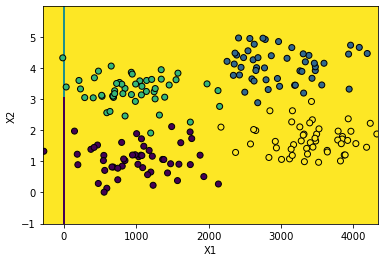

In [22]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X))
X_scaled = scaler.transform(X)
X_scaled = scaler.transform(X)

StandardScaler()


In [32]:
confusion_matrix(y, clf.predict(X_scaled))

array([[ 0,  9,  0, 41],
       [ 0, 50,  0,  0],
       [ 0, 22, 28,  0],
       [ 0, 50,  0,  0]], dtype=int64)

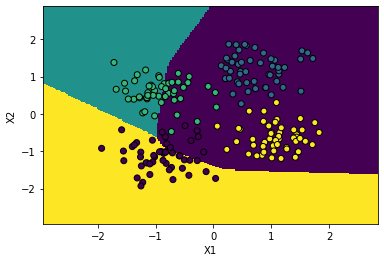

In [33]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [37]:
clf = MLPClassifier(hidden_layer_sizes=(6,), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.79211772
Iteration 2, loss = 1.78730263
Iteration 3, loss = 1.78250688
Iteration 4, loss = 1.77773075
Iteration 5, loss = 1.77297455
Iteration 6, loss = 1.76823766
Iteration 7, loss = 1.76351520
Iteration 8, loss = 1.75880877
Iteration 9, loss = 1.75412097
Iteration 10, loss = 1.74945394
Iteration 11, loss = 1.74480762
Iteration 12, loss = 1.74018150
Iteration 13, loss = 1.73557170
Iteration 14, loss = 1.73098338
Iteration 15, loss = 1.72641680
Iteration 16, loss = 1.72187137
Iteration 17, loss = 1.71735281
Iteration 18, loss = 1.71285496
Iteration 19, loss = 1.70837809
Iteration 20, loss = 1.70392056
Iteration 21, loss = 1.69948534
Iteration 22, loss = 1.69507103
Iteration 23, loss = 1.69067770
Iteration 24, loss = 1.68631019
Iteration 25, loss = 1.68196296
Iteration 26, loss = 1.67764579
Iteration 27, loss = 1.67335142
Iteration 28, loss = 1.66907703
Iteration 29, loss = 1.66482852
Iteration 30, loss = 1.66060269
Iteration 31, loss = 1.65639627
Iteration 32, los

Iteration 390, loss = 0.73367332
Iteration 391, loss = 0.73170672
Iteration 392, loss = 0.72974172
Iteration 393, loss = 0.72777874
Iteration 394, loss = 0.72581789
Iteration 395, loss = 0.72385929
Iteration 396, loss = 0.72190301
Iteration 397, loss = 0.71994917
Iteration 398, loss = 0.71799783
Iteration 399, loss = 0.71604767
Iteration 400, loss = 0.71409761
Iteration 401, loss = 0.71214995
Iteration 402, loss = 0.71020478
Iteration 403, loss = 0.70826221
Iteration 404, loss = 0.70632232
Iteration 405, loss = 0.70438399
Iteration 406, loss = 0.70244713
Iteration 407, loss = 0.70051301
Iteration 408, loss = 0.69858169
Iteration 409, loss = 0.69664830
Iteration 410, loss = 0.69471436
Iteration 411, loss = 0.69277970
Iteration 412, loss = 0.69084745
Iteration 413, loss = 0.68891904
Iteration 414, loss = 0.68699528
Iteration 415, loss = 0.68507463
Iteration 416, loss = 0.68315733
Iteration 417, loss = 0.68124375
Iteration 418, loss = 0.67933402
Iteration 419, loss = 0.67742783
Iteration 

Iteration 762, loss = 0.26149463
Iteration 763, loss = 0.26089072
Iteration 764, loss = 0.26028923
Iteration 765, loss = 0.25969014
Iteration 766, loss = 0.25909347
Iteration 767, loss = 0.25849922
Iteration 768, loss = 0.25790735
Iteration 769, loss = 0.25731820
Iteration 770, loss = 0.25673155
Iteration 771, loss = 0.25614735
Iteration 772, loss = 0.25556558
Iteration 773, loss = 0.25498624
Iteration 774, loss = 0.25440931
Iteration 775, loss = 0.25383479
Iteration 776, loss = 0.25326268
Iteration 777, loss = 0.25269295
Iteration 778, loss = 0.25212561
Iteration 779, loss = 0.25156064
Iteration 780, loss = 0.25099803
Iteration 781, loss = 0.25043786
Iteration 782, loss = 0.24988016
Iteration 783, loss = 0.24932480
Iteration 784, loss = 0.24877178
Iteration 785, loss = 0.24822108
Iteration 786, loss = 0.24767269
Iteration 787, loss = 0.24712659
Iteration 788, loss = 0.24658277
Iteration 789, loss = 0.24604121
Iteration 790, loss = 0.24550190
Iteration 791, loss = 0.24496484
Iteration 

Iteration 1195, loss = 0.12606876
Iteration 1196, loss = 0.12591893
Iteration 1197, loss = 0.12576947
Iteration 1198, loss = 0.12562037
Iteration 1199, loss = 0.12547164
Iteration 1200, loss = 0.12532327
Iteration 1201, loss = 0.12517525
Iteration 1202, loss = 0.12502760
Iteration 1203, loss = 0.12488030
Iteration 1204, loss = 0.12473336
Iteration 1205, loss = 0.12458678
Iteration 1206, loss = 0.12444054
Iteration 1207, loss = 0.12429467
Iteration 1208, loss = 0.12414914
Iteration 1209, loss = 0.12400397
Iteration 1210, loss = 0.12385914
Iteration 1211, loss = 0.12371466
Iteration 1212, loss = 0.12357055
Iteration 1213, loss = 0.12342678
Iteration 1214, loss = 0.12328336
Iteration 1215, loss = 0.12314029
Iteration 1216, loss = 0.12299755
Iteration 1217, loss = 0.12285517
Iteration 1218, loss = 0.12271312
Iteration 1219, loss = 0.12257141
Iteration 1220, loss = 0.12243004
Iteration 1221, loss = 0.12228900
Iteration 1222, loss = 0.12214833
Iteration 1223, loss = 0.12200802
Iteration 1224

In [38]:
confusion_matrix(y, clf.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 50,  0,  0],
       [ 2,  1, 47,  0],
       [ 1,  0,  0, 49]], dtype=int64)

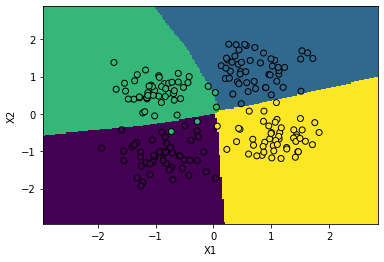

In [39]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [40]:
clf = MLPClassifier(hidden_layer_sizes=(6, 6, 6), max_iter=10_000).fit(X_scaled, y)

In [41]:
confusion_matrix(y, clf.predict(X_scaled))

array([[49,  0,  1,  0],
       [ 0, 50,  0,  0],
       [ 1,  0, 49,  0],
       [ 0,  0,  0, 50]], dtype=int64)

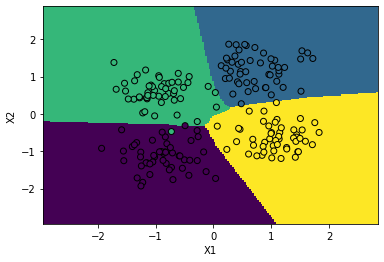

In [42]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### Задания для самостоятельного выполнения

#### 1) Создайте однослойный перцептрон с 1, 2, 10 и 100 нейронами. Сравние их точность и сделайте вывод о достаточном количестве нейронов.

In [43]:
X, y = make_blobs(n_samples=200,
                          centers=blob_centers,
                          cluster_std=0.5,
                          random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


neuron_counts = [1, 2, 10, 100]
for neurons in neuron_counts:

    clf = MLPClassifier(hidden_layer_sizes=(neurons,), max_iter=1000, random_state=0)

    clf.fit(X_train, y_train)


    y_pred = clf.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)

    print(f"Точность для {neurons} нейронов: {accuracy:.4f}")

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Точность для 1 нейронов: 0.6000


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Точность для 2 нейронов: 0.7250


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Точность для 10 нейронов: 0.9250
Точность для 100 нейронов: 0.9000


#### 2) Создайте и оцените модель с двумя, тремя и десятью скрытыми слоями с одинаковым количеством нейронов. Сравните их точность и сделайте вывод о достаточном количестве слоев.

In [46]:
layer_counts = [2, 3, 10]
neurons_per_layer = 10

for layers in layer_counts:

    clf = MLPClassifier(hidden_layer_sizes=(neurons_per_layer,) * layers, max_iter=1000, random_state=42)


    clf.fit(X_train, y_train)


    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Точность для {layers} слоев: {accuracy:.4f}")

Точность для 2 слоев: 0.9000
Точность для 3 слоев: 0.9000
Точность для 10 слоев: 0.9250


#### 3) Для глубокой модели выведите веса всех нейронов на всех слоях. Выведите значения векторов весов смещения.

In [48]:
clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, random_state=0)
clf.fit(X_train, y_train)

for i, coef in enumerate(clf.coefs_):
    print(f"Веса для слоя {i + 1}:")
    print(coef)

for i, intercept in enumerate(clf.intercepts_):
    print(f"Смещения для слоя {i + 1}:")
    print(intercept)

Веса для слоя 1:
[[ 3.61869790e-01  5.82059179e-01  3.29475317e-01 -3.02279720e-01
  -9.00966197e-07 -2.28930545e-02 -6.84960083e-08  8.95181269e-01
   9.16022827e-01 -1.09659836e-02]
 [ 2.79471508e-01  6.76819568e-02  4.28550969e-01  8.70485542e-01
  -1.18119416e-01 -2.26589838e-01 -1.62622478e-01  2.68684599e-01
   4.01270902e-01  7.88729330e-01]]
Веса для слоя 2:
[[ 6.94249838e-02  1.06673240e-02 -1.45225110e-01  6.49696919e-09
  -7.55146585e-02  9.25689969e-02  2.89025677e-01  4.32634248e-01
   7.26649686e-01  4.64552137e-01]
 [ 5.08448310e-01  4.62028759e-01  3.68538345e-01 -5.49644119e-02
   1.92152723e-04  3.91942899e-01 -3.80406604e-01 -2.59852056e-01
  -2.11916355e-02  1.73754315e-01]
 [ 6.42407350e-01  5.86455313e-01  9.69609228e-01 -3.74246425e-02
  -8.71576419e-03 -1.70380680e-01 -1.47737840e-01 -4.91469643e-01
   8.78169313e-02 -7.47529700e-01]
 [-7.56904842e-01 -8.26118435e-01  2.79086847e-01 -2.50738599e-02
  -1.08327732e-02 -2.52812045e-01  4.07076746e-01  2.04616425e-0

#### 4) Постройте и оцените модель с большим количеством нейронов и слоев. Замерьте время выполнения обучения, сравните со временем обучения более простых моделей.

In [53]:
import time

def time_MLPClassifier(neurons, layers):
    neurons_per_layer = neurons
    layer_counts = layers

    start_time = time.time()

    clf = MLPClassifier(hidden_layer_sizes=(neurons_per_layer,) * layer_counts, max_iter=1000, random_state=0)
    clf.fit(X_train, y_train)

    end_time = time.time()
    training_time = end_time - start_time

    accuracy = clf.score(X_test, y_test)

    print(f"Точность модели: {accuracy:.4f}")
    print(f"Время обучения: {training_time:.2f} секунд")
    
time_MLPClassifier(400, 8)

Точность модели: 0.9250
Время обучения: 7.99 секунд


In [54]:
time_MLPClassifier(20, 3)

Точность модели: 0.9250
Время обучения: 0.60 секунд


#### 5) Постройте и оцените модель классификации с помощью перцептрона на датасете, который вы использовали на контрольной по классификиации (если вы ее не выполняли, возьмите любой датасет из раздела "real world datasets" в библиотеке sklearn).

In [82]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
columns, rows = df.shape
print(f"Число строк (объектов): {columns}")
print(f"Число столбцов (признаков): {rows}")

Число строк (объектов): 569
Число столбцов (признаков): 30


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

neurons = [2, 3, 5, 10]
layers = [2, 3, 5, 10]

neurons = [2, 3, 5, 10]
layers = [2, 3, 5, 10]

for neuron in neurons:
    for layer in layers:
        perceptron = MLPClassifier(hidden_layer_sizes=(neuron,)*layer, max_iter=2000, random_state=0)
        perceptron.fit(X_train, y_train)

        y_pred = perceptron.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        print(f"Точность модели на датасете: {accuracy:.3f}, нейронов: {neuron}, слоев: {layer}")

Точность модели на датасете: 0.588, нейронов: 2, слоев: 2
Точность модели на датасете: 0.588, нейронов: 2, слоев: 3
Точность модели на датасете: 0.588, нейронов: 2, слоев: 5
Точность модели на датасете: 0.588, нейронов: 2, слоев: 10
Точность модели на датасете: 0.588, нейронов: 3, слоев: 2
Точность модели на датасете: 0.588, нейронов: 3, слоев: 3
Точность модели на датасете: 0.947, нейронов: 3, слоев: 5
Точность модели на датасете: 0.588, нейронов: 3, слоев: 10
Точность модели на датасете: 0.596, нейронов: 5, слоев: 2
Точность модели на датасете: 0.947, нейронов: 5, слоев: 3
Точность модели на датасете: 0.939, нейронов: 5, слоев: 5
Точность модели на датасете: 0.930, нейронов: 5, слоев: 10
Точность модели на датасете: 0.947, нейронов: 10, слоев: 2
Точность модели на датасете: 0.947, нейронов: 10, слоев: 3
Точность модели на датасете: 0.930, нейронов: 10, слоев: 5
Точность модели на датасете: 0.930, нейронов: 10, слоев: 10


#### 6) Постройте и оцените модель регрессии с помощью перцептрона на датасете, который вы использовали на контрольной по регрессии.

In [78]:
from sklearn.datasets import fetch_openml

data = fetch_openml("ERA", version = 1)
print(data.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [79]:
df = pd.DataFrame(data.data, columns=data.feature_names)
columns, rows = df.shape
print(f"Число строк (объектов): {columns}")
print(f"Число столбцов (признаков): {rows}")

Число строк (объектов): 1000
Число столбцов (признаков): 4


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

neurons = [2, 3, 5, 10]
layers = [2, 3, 5, 10]

neurons = [2, 3, 5, 10]
layers = [2, 3, 5, 10]

for neuron in neurons:
    for layer in layers:
        perceptron = MLPClassifier(hidden_layer_sizes=(neuron,)*layer, max_iter=2000, random_state=0)
        perceptron.fit(X_train, y_train)

        y_pred = perceptron.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        print(f"Точность модели на датасете: {accuracy:.3f}, нейронов: {neuron}, слоев: {layer}")

Точность модели на датасете: 0.220, нейронов: 2, слоев: 2
Точность модели на датасете: 0.220, нейронов: 2, слоев: 3
Точность модели на датасете: 0.105, нейронов: 2, слоев: 5
Точность модели на датасете: 0.110, нейронов: 2, слоев: 10
Точность модели на датасете: 0.265, нейронов: 3, слоев: 2
Точность модели на датасете: 0.250, нейронов: 3, слоев: 3
Точность модели на датасете: 0.235, нейронов: 3, слоев: 5
Точность модели на датасете: 0.110, нейронов: 3, слоев: 10
Точность модели на датасете: 0.185, нейронов: 5, слоев: 2
Точность модели на датасете: 0.155, нейронов: 5, слоев: 3
Точность модели на датасете: 0.200, нейронов: 5, слоев: 5
Точность модели на датасете: 0.110, нейронов: 5, слоев: 10
Точность модели на датасете: 0.260, нейронов: 10, слоев: 2
Точность модели на датасете: 0.235, нейронов: 10, слоев: 3
Точность модели на датасете: 0.235, нейронов: 10, слоев: 5
Точность модели на датасете: 0.215, нейронов: 10, слоев: 10
